In [1]:
import pandas as pd
import os

### file loading

In [2]:
path = '../data/rhoda_kellogg'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

# for f in files:
#     print(os.path.basename(f))

In [3]:
rk = pd.DataFrame(files, columns=['filepath']) 

In [4]:
rk['imagenum'] = rk['filepath'].apply(lambda x: os.path.splitext(x.split('/')[-1])[0])

In [5]:
rk['imagenum'] = rk['imagenum'].apply(lambda s: int(s.lstrip("0")))

In [6]:
rk['card'] = rk['filepath'].apply(lambda x: os.path.splitext(x.split('/')[-2])[0])

In [7]:
rk['cardnum'] = rk['card'].apply(lambda s: int(s.split(" ")[1]))

In [8]:
rk.head()

filepath  imagenum    card  cardnum
0  ../data/rhoda_kellogg/CARD 1/00000001.jpg         1  CARD 1        1
1  ../data/rhoda_kellogg/CARD 1/00000002.jpg         2  CARD 1        1
2  ../data/rhoda_kellogg/CARD 1/00000003.jpg         3  CARD 1        1
3  ../data/rhoda_kellogg/CARD 1/00000004.jpg         4  CARD 1        1
4  ../data/rhoda_kellogg/CARD 1/00000005.jpg         5  CARD 1        1

In [9]:
rk['cardnum'].unique()

array([  1,  10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,  11,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119,  12, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129,  13, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139,  14, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149,  15, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159,  16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,  18, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189,  19, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199,   2,  20, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209,  21, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219,  22, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229,  23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
        24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,  25, 250,
       251, 252, 253, 254, 255,  26,  27,  28,  29,   3,  30,  3

In [10]:
# rk['card']
# rk.imagenum

### preview images

In [11]:
from skimage import data, io, filters, exposure
from skimage.io import imshow, imread
from pylab import *

# for jupyter run
%matplotlib inline

In [12]:
def show_image(filename):
    image = imread(filename)
    imshow(image, cmap='gray')

In [13]:
filename = rk[rk['imagenum']==100]['filepath'].item()
filename

'../data/rhoda_kellogg/CARD 4/00000100.jpg'

In [14]:
image = imread(filename)

In [26]:
image.shape

(1200, 1479)

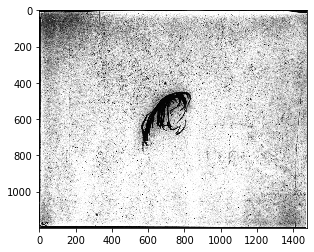

In [15]:
imshow(image, cmap='gray')

loop over images

In [16]:
# integer indexing
# for i in range(cardimages.size):
#     print(cardimages.iloc(0)[i])

# pandas iteration
# for item in cardimages.iteritems(): 
#     print(item)

In [17]:
def plot_card(cardnum):
    
    cardimages = rk[rk['cardnum']==cardnum]['filepath']
    
    fig = figure(figsize=(10, 10), dpi=150)
    fig.suptitle('Card {0}'.format(cardnum), fontsize=10)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

    n, m = 8, 8
    for i in range(0, min(n * m, cardimages.size)):
        subplot(n, m, i+1)
        filename = cardimages.iloc(0)[i]
        image = imread(filename)
        imshow(image, cmap='gray') 
        axis('off')

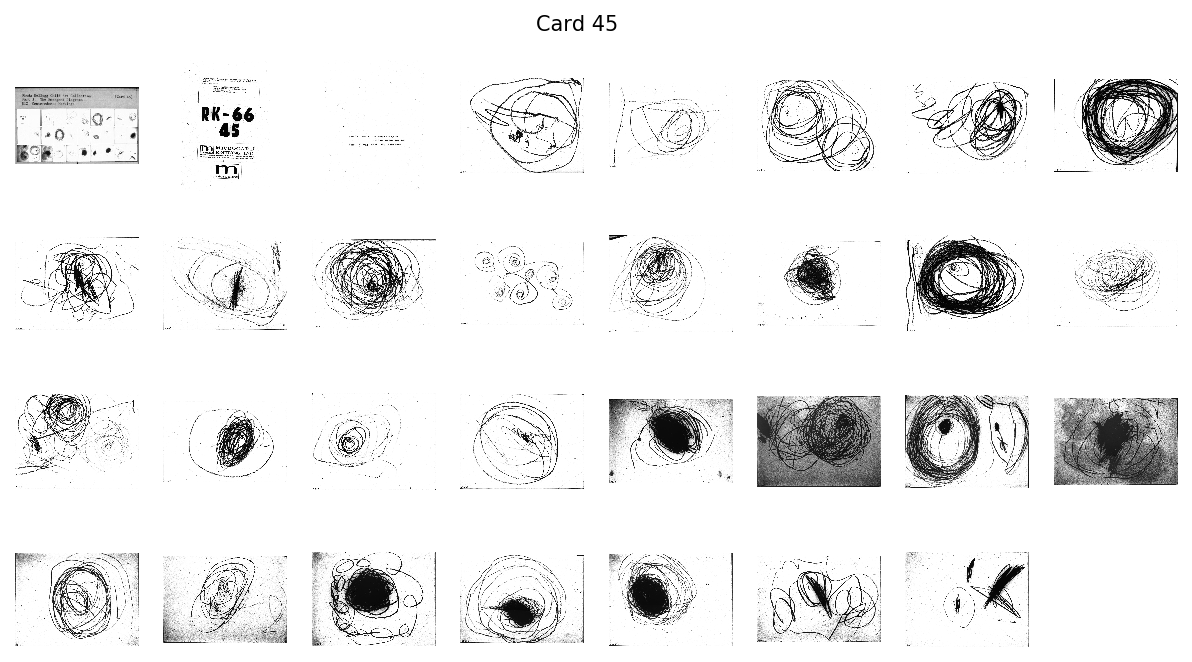

In [18]:
plot_card(45)

In [19]:
# for i in range(20, 30):
#     plot_card(i)

## Cleaning

In [20]:
# drop all intro cards

In [21]:
def plot_subset(rows):
    
    cardimages = rows['filepath']
    
    fig = figure(figsize=(10, 10), dpi=150)
    fig.tight_layout()

    n, m = 5, 5
    for i in range(0, min(n * m, cardimages.size)):
        filename = cardimages.iloc(0)[i]
        ax1 = fig.add_subplot(n, m, i+1)
#         ax1.title.set_text(filename)
        image = imread(filename)
        imshow(image, cmap='gray') 
        axis('off')

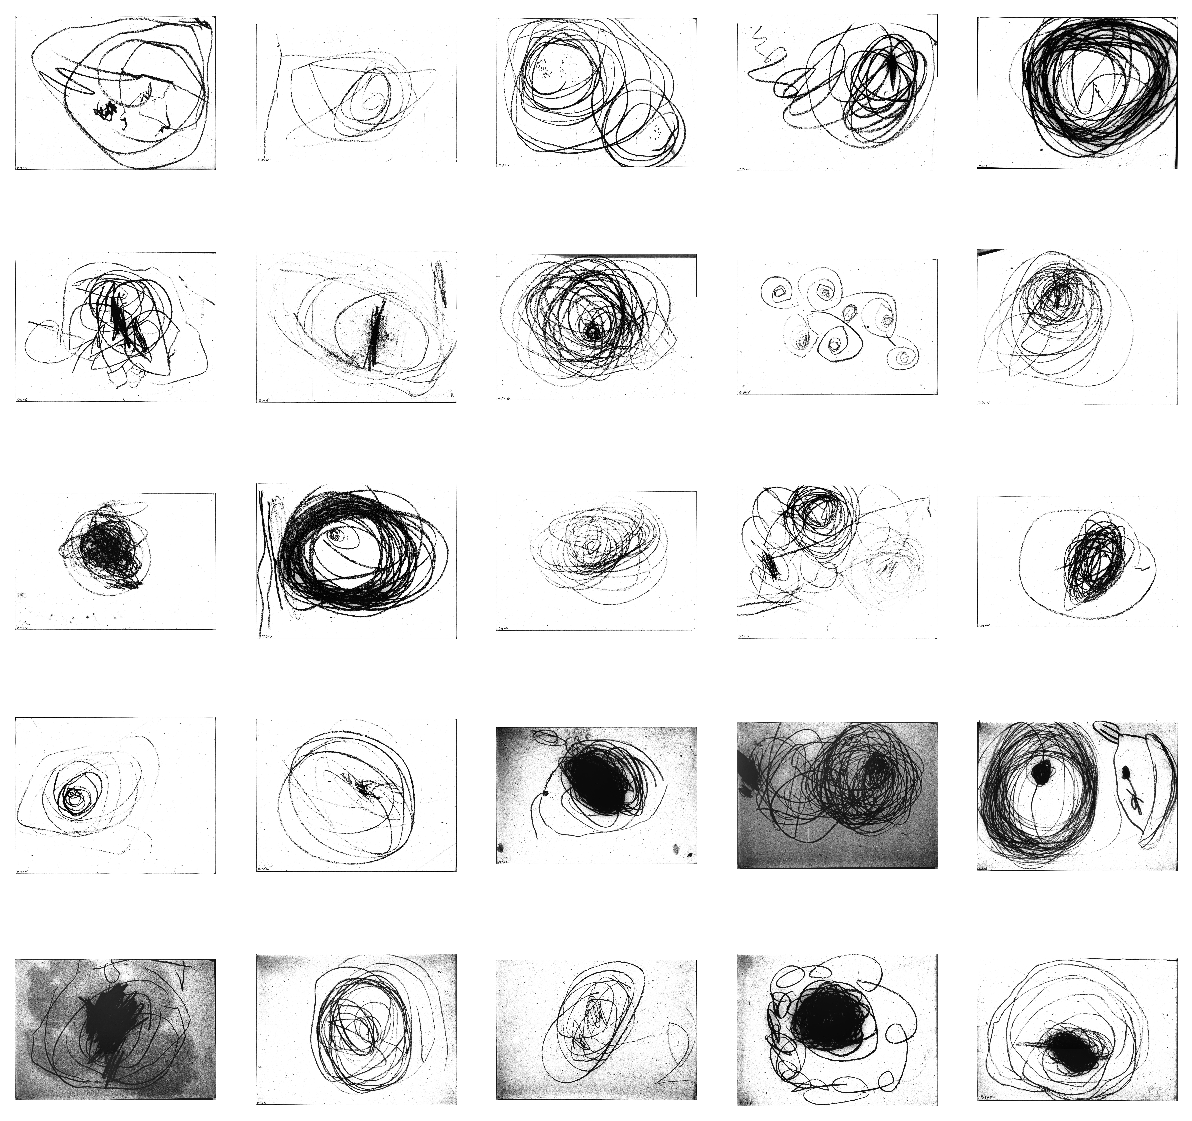

In [24]:
rows = rk[rk['cardnum']==45].iloc(0)[3:]
plot_subset(rows)

### image stats

In [29]:
def calc_image_stats(filename, show=False):
    try: 
        image = imread(filename)
        if show:
            imshow(image, cmap='gray')
        shape = image.shape
        mean = np.mean(image)
    except TypeError as e:
        print("error {0} with image {1}".format(e, filename))
        shape = None
        mean = None
    return shape, mean

(1200, 1594) 184.17520911752405


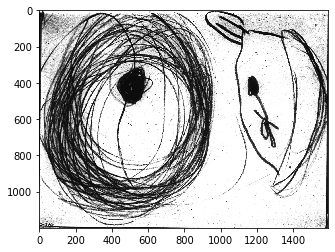

In [30]:
# filename = rk[rk['imagenum']==100]['filepath'].item()
filename = rk[rk['cardnum']==45].iloc(0)[22]['filepath']

shape, mean = calc_image_stats(filename, show=True)
print(shape, mean)
# shape, mean = calc_image_stats(filename)

In [31]:
# for item in drawings[drawings['cardnum']==45]['filename]'.iteritems():
#     print(item)
# drawings[drawings['cardnum']==45]

In [32]:
# BAD to modify while iterating
# for index, row in rk.iterrows():
#     shape, mean = calc_image_stats(row['filepath'])
# #     print(shape, mean)
#     print(rk[index])

In [33]:
rk['shape'], rk['mean'] = zip(*rk['filepath'].map(calc_image_stats))
rk.head()

error unsupported operand type(s) for /: 'JpegImageFile' and 'int' with image ../data/rhoda_kellogg/CARD 70/00002164.jpg


filepath  imagenum    card  cardnum  \
0  ../data/rhoda_kellogg/CARD 1/00000001.jpg         1  CARD 1        1   
1  ../data/rhoda_kellogg/CARD 1/00000002.jpg         2  CARD 1        1   
2  ../data/rhoda_kellogg/CARD 1/00000003.jpg         3  CARD 1        1   
3  ../data/rhoda_kellogg/CARD 1/00000004.jpg         4  CARD 1        1   
4  ../data/rhoda_kellogg/CARD 1/00000005.jpg         5  CARD 1        1   

          shape     mean  
0   (917, 1600)  222.475  
1   (1200, 690)  225.561  
2   (1200, 834)  253.465  
3  (1200, 1011)  239.736  
4  (1200, 1547)  247.878

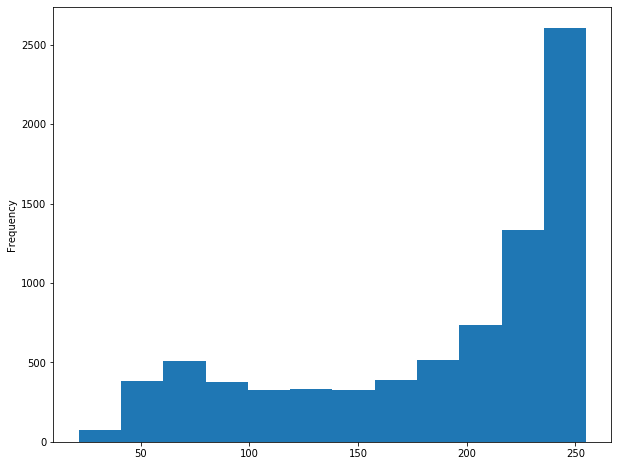

In [34]:
ax = rk['mean'].plot.hist(bins=12, figsize=(10,8))

### separate drawings out

In [45]:
drawings = pd.DataFrame()

for cardnum in np.sort(rk['cardnum'].unique()):
    # print(cardnum)
    cardrows = rk[rk['cardnum']==cardnum]
    cardrows = cardrows.iloc(0)[3:]
    drawings = drawings.append(cardrows)
#     print(cardrows)
#     for 

In [46]:
drawings.head()

filepath  imagenum    card  cardnum  \
3  ../data/rhoda_kellogg/CARD 1/00000004.jpg         4  CARD 1        1   
4  ../data/rhoda_kellogg/CARD 1/00000005.jpg         5  CARD 1        1   
5  ../data/rhoda_kellogg/CARD 1/00000006.jpg         6  CARD 1        1   
6  ../data/rhoda_kellogg/CARD 1/00000007.jpg         7  CARD 1        1   
7  ../data/rhoda_kellogg/CARD 1/00000008.jpg         8  CARD 1        1   

          shape     mean  
3  (1200, 1011)  239.736  
4  (1200, 1547)  247.878  
5  (1169, 1600)  149.555  
6  (1167, 1600)  193.511  
7  (1096, 1600)  249.368

In [49]:
dark_images = drawings[drawings['mean'] < 150]
len(dark_images)

2138

In [50]:
len(rk)-len(dark_images) # how many are light?

5762

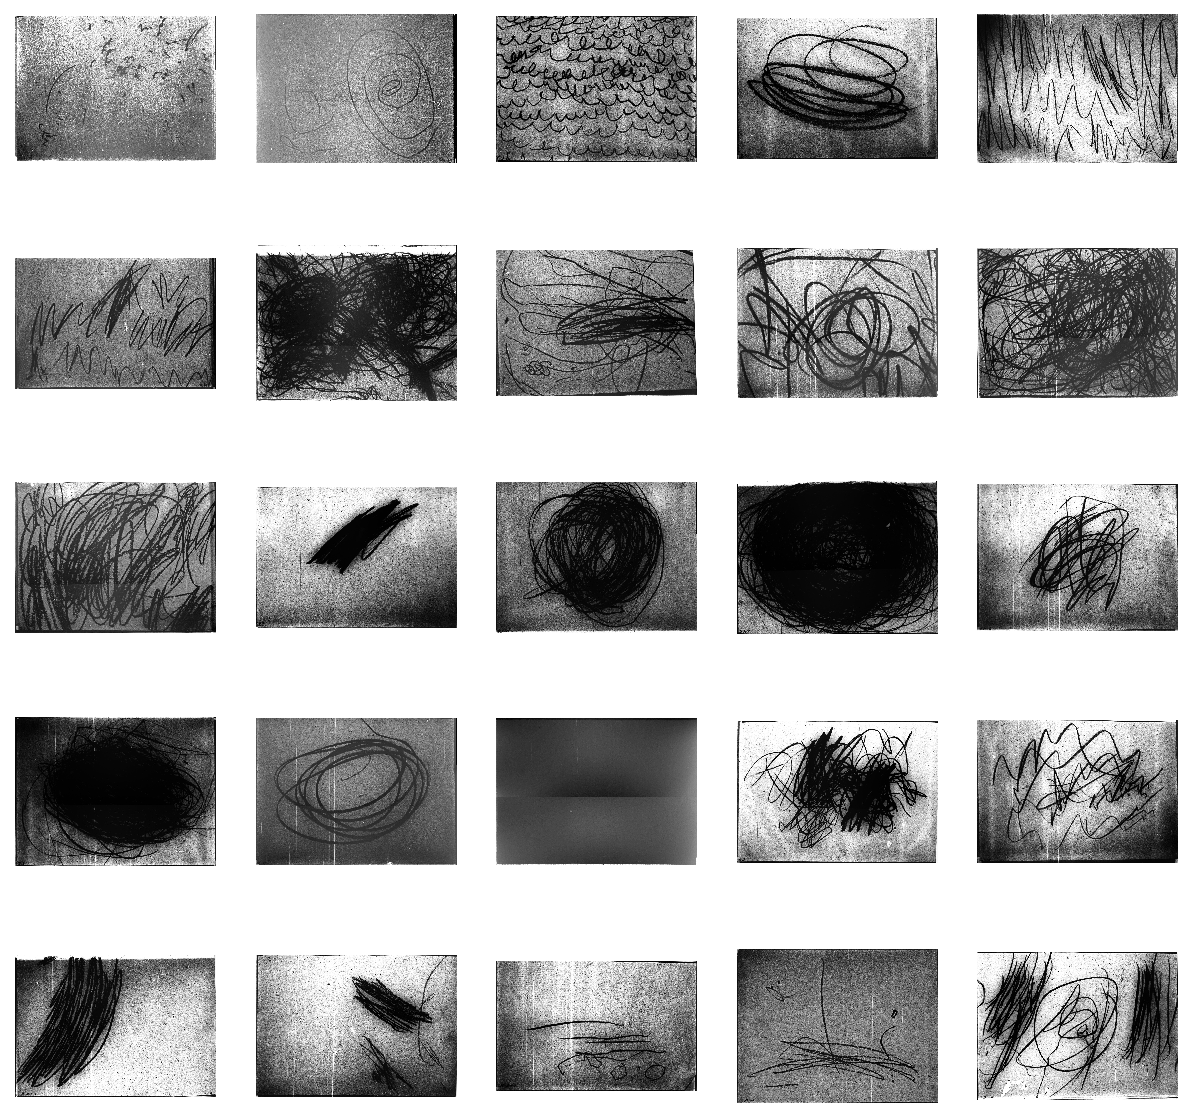

In [51]:
plot_subset(dark_images)

In [52]:
light_images = drawings[drawings['mean'] >= 150]

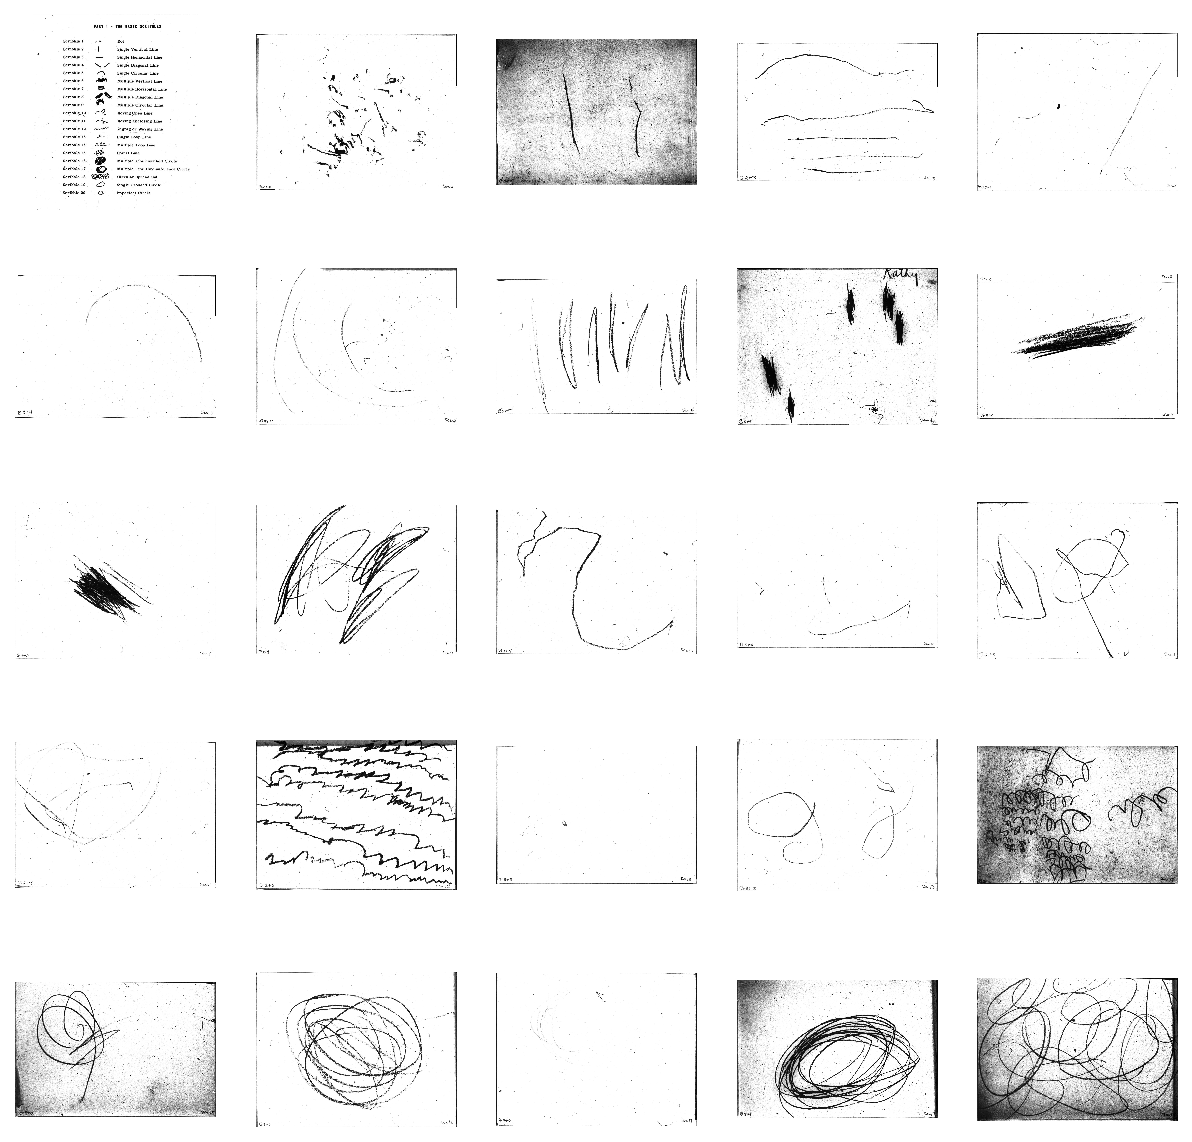

In [53]:
plot_subset(light_images)

## Disk Operations

In [54]:
rk.to_csv('../data/rk.csv', index=False)
drawings.to_csv('../data/drawings.csv', index=False)

## Read from disk

In [2]:
## read from disk
rk_new = pd.read_csv('../data/rk.csv')
rk_new.head()

filepath  imagenum    card  cardnum  \
0  ../data/rhoda_kellogg/CARD 1/00000001.jpg         1  CARD 1        1   
1  ../data/rhoda_kellogg/CARD 1/00000002.jpg         2  CARD 1        1   
2  ../data/rhoda_kellogg/CARD 1/00000003.jpg         3  CARD 1        1   
3  ../data/rhoda_kellogg/CARD 1/00000004.jpg         4  CARD 1        1   
4  ../data/rhoda_kellogg/CARD 1/00000005.jpg         5  CARD 1        1   

          shape        mean  
0   (917, 1600)  222.474917  
1   (1200, 690)  225.560709  
2   (1200, 834)  253.464916  
3  (1200, 1011)  239.736234  
4  (1200, 1547)  247.878187

In [3]:
# read from disk
drawings = pd.read_csv('../data/drawings.csv')
drawings.head()

filepath  imagenum    card  cardnum  \
0  ../data/rhoda_kellogg/CARD 1/00000004.jpg         4  CARD 1        1   
1  ../data/rhoda_kellogg/CARD 1/00000005.jpg         5  CARD 1        1   
2  ../data/rhoda_kellogg/CARD 1/00000006.jpg         6  CARD 1        1   
3  ../data/rhoda_kellogg/CARD 1/00000007.jpg         7  CARD 1        1   
4  ../data/rhoda_kellogg/CARD 1/00000008.jpg         8  CARD 1        1   

          shape        mean  
0  (1200, 1011)  239.736234  
1  (1200, 1547)  247.878187  
2  (1169, 1600)  149.554797  
3  (1167, 1600)  193.510785  
4  (1096, 1600)  249.367505

In [4]:
drawings[drawings["imagenum"]==102]

filepath  imagenum    card  cardnum  \
89  ../data/rhoda_kellogg/CARD 4/00000102.jpg       102  CARD 4        4   

           shape       mean  
89  (1200, 1565)  28.867121

### Preprocessing for StyleGAN
Save out as square...

In [6]:
# !pip3 install Augmentor

Copy drawing files to temp directory:

In [5]:
#!mkdir /tmp/drawings

In [6]:
import shutil
def copy_to_tmp(filepath):
    shutil.copy(filepath, "/tmp/drawings")

In [7]:
# test it:
# copy_to_tmp(drawings.iloc(0)[0]['filepath'])

In [8]:
# move files to tmp
drawings[drawings["mean"]>=128]['filepath'].map(copy_to_tmp)
print("done")

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
29      None
31      None
        ... 
7103    None
7104    None
7105    None
7106    None
7107    None
7108    None
7109    None
7110    None
7111    None
7112    None
7113    None
7114    None
7115    None
7116    None
7118    None
7119    None
7120    None
7121    None
7123    None
7124    None
7125    None
7126    None
7127    None
7128    None
7129    None
7130    None
7131    None
7132    None
7133    None
7134    None
Name: filepath, Length: 5354, dtype: object

Remove images that can't be opened

In [32]:
#!pip3 install fastai

     |████████████████████████████████| 237 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 81.1 MB 114 kB/s eta 0:00:01     |█████▋                          | 14.3 MB 5.1 MB/s eta 0:00:14     |████████████████▋               | 42.2 MB 3.6 MB/s eta 0:00:11     |███████████████████▌            | 49.6 MB 5.0 MB/s eta 0:00:07     |██████████████████████▊         | 57.6 MB 9.0 MB/s eta 0:00:03     |███████████████████████████▉    | 70.6 MB 4.8 MB/s eta 0:00:03     |█████████████████████████████▎  | 74.3 MB 4.8 MB/s eta 0:00:02
     |████████████████████████████████| 88 kB 6.8 MB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 118 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 2.9 MB/

In [9]:
from fastai.vision import *
verify_images('/tmp/drawings/', delete=True)

Use Augmentor to resize:

In [10]:
import Augmentor
# /Users/rtwomey/children/data/drawings_resized
p = Augmentor.Pipeline("/tmp/drawings/", "/Users/rtwomey/children/data/drawings2", save_format="JPEG")

Initialised with 5354 image(s) found.
Output directory set to /Users/rtwomey/children/data/drawings2.

In [11]:
p.resize(probability=1.0, width=512, height=512)

In [12]:
# only for augmentation
#p.random_color(probability=1.0,min_factor=0.5,max_factor=0.9)

In [13]:
p.process()

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x13442C668>: 100%|██████████| 5354/5354 [03:01<00:00, 29.47 Samples/s]


create a tar file

In [16]:
!cd /Users/rtwomey/children/data/
!tar -cvzf drawings2.tar.gz drawings2/

a drawings2.tar.gz
tar: drawings2: Cannot stat: No such file or directory
� jJe^ K)J,��K/6�+I,�K�b�000031Q ��f�`�� cSCc3cC#SC#CsSCZ8�=tJQIy~nj%Nu@eiix́�DN ��������� ��8A�'��Ao���,��Q0
F�(4 a�                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### denoising / adjusting / histogram equalization

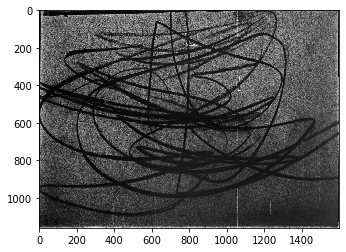

In [59]:
filename = rk[rk['imagenum']==289]['filepath'].item()
show_image(filename)

mean before: 68.45642834051723
mean after: 124.34350541101799


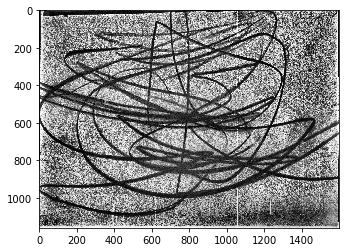

In [60]:
image = imread(filename)
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)
imshow(img_adapteq, cmap='gray')
print("mean before:", np.mean(image))
print("mean after:", np.mean(img_adapteq)*255.0)

mean before: 68.45642834051723
mean after: 128.43222529064627


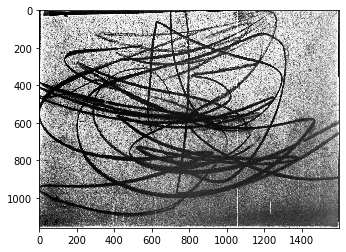

In [61]:
img_eq = exposure.equalize_hist(image)
imshow(img_eq, cmap='gray')
print("mean before:", np.mean(image))
print("mean after:", np.mean(img_eq)*255.0)

In [63]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [ ]:
noisy = img_eq

denoise = denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15, multichannel=False)

# denoise = denoise_tv_chambolle(noisy, weight=0.2, multichannel=False)
plt.figure(figsize = (10,8))
plt.imshow(denoise, cmap='gray', )

## References
- histogram equalization https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html
- gamma and log contrst https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_log_gamma.html